In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [4]:
df = df.drop(["Name"],axis=1)

In [5]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [7]:
df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [8]:
df["Ticket"].is_unique

False

In [9]:
df["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [10]:
dummies = pd.get_dummies(df.Sex, dtype=int)

In [11]:
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [12]:
df = pd.concat([df,dummies], axis=1)

In [13]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,female,male
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [14]:
df.drop(["Sex","Cabin","male"],axis = 1, inplace = True)

In [15]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,female
0,1,3,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,3,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,35.0,1,0,113803,53.1000,S,1,1
4,5,3,35.0,0,0,373450,8.0500,S,0,0


In [16]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [17]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
df["Embarked"].isnull().sum()

2

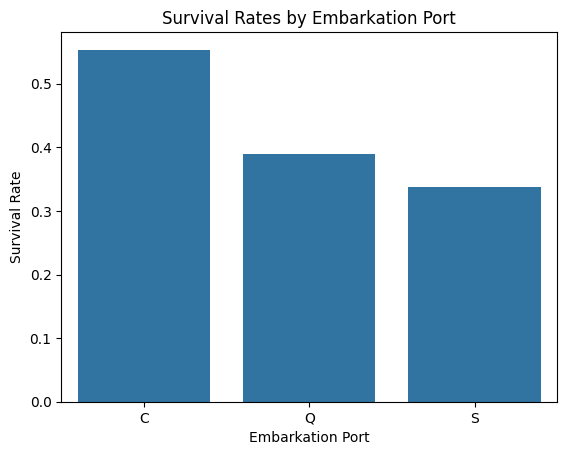

In [19]:
survival_rates = df.groupby("Embarked")["Survived"].mean().reset_index()

# Plot the survival rates
sns.barplot(x="Embarked", y="Survived", data=survival_rates)
plt.title("Survival Rates by Embarkation Port")
plt.ylabel("Survival Rate")
plt.xlabel("Embarkation Port")
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
ohe = LabelEncoder()

In [21]:
embarked_encoded = ohe.fit_transform(df[['Embarked']])

C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
df["embarked_encoded"] = embarked_encoded

In [24]:
df["embarked_encoded"].unique()

array([2, 0, 1, 3])

In [25]:
df["embarked_encoded"].value_counts()

embarked_encoded
2    644
0    168
1     77
3      2
Name: count, dtype: int64

In [26]:
df[df["embarked_encoded"]==3] = 2

In [27]:
df["embarked_encoded"].value_counts()

embarked_encoded
2    646
0    168
1     77
Name: count, dtype: int64

In [28]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,female,embarked_encoded
0,1,3,22.0,1,0,A/5 21171,7.2500,S,0,0,2
1,2,1,38.0,1,0,PC 17599,71.2833,C,1,1,0
2,3,3,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,2
3,4,1,35.0,1,0,113803,53.1000,S,1,1,2
4,5,3,35.0,0,0,373450,8.0500,S,0,0,2


In [32]:
df["Age"].fillna(df["Age"].mean(), inplace=True)


In [33]:
df.Age.isnull().sum()

0

In [35]:
df["Parch"].value_counts()

Parch
0    676
1    118
2     82
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [37]:
X = df[["Pclass", "Age", "female", "embarked_encoded"]]

In [38]:
y=df.Survived

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2)

In [41]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [42]:
model.fit(X_train,y_train)

GaussianNB()

In [43]:
model.score(X_test,y_test)

0.7812061711079944

In [44]:
y_test[0:10]

196    0
175    0
885    0
702    0
77     0
193    1
536    0
64     0
409    0
396    0
Name: Survived, dtype: int64

In [45]:
model.predict(X_test[0:10])

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [46]:
model.predict_proba(X_test[:10])

array([[0.9087262 , 0.0912738 , 0.        ],
       [0.93801465, 0.06198535, 0.        ],
       [0.22547024, 0.77452976, 0.        ],
       [0.06064112, 0.93935888, 0.        ],
       [0.94423555, 0.05576445, 0.        ],
       [0.86111277, 0.13888723, 0.        ],
       [0.72350867, 0.27649133, 0.        ],
       [0.26422947, 0.73577053, 0.        ],
       [0.31060156, 0.68939844, 0.        ],
       [0.31364892, 0.68635108, 0.        ]])

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.69444444, 0.75      , 0.75      , 0.74285714, 0.85714286])